# Company Data Set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df=pd.read_csv('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Decision%20Tree/Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
#getting information of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df.shape

(400, 11)

In [5]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

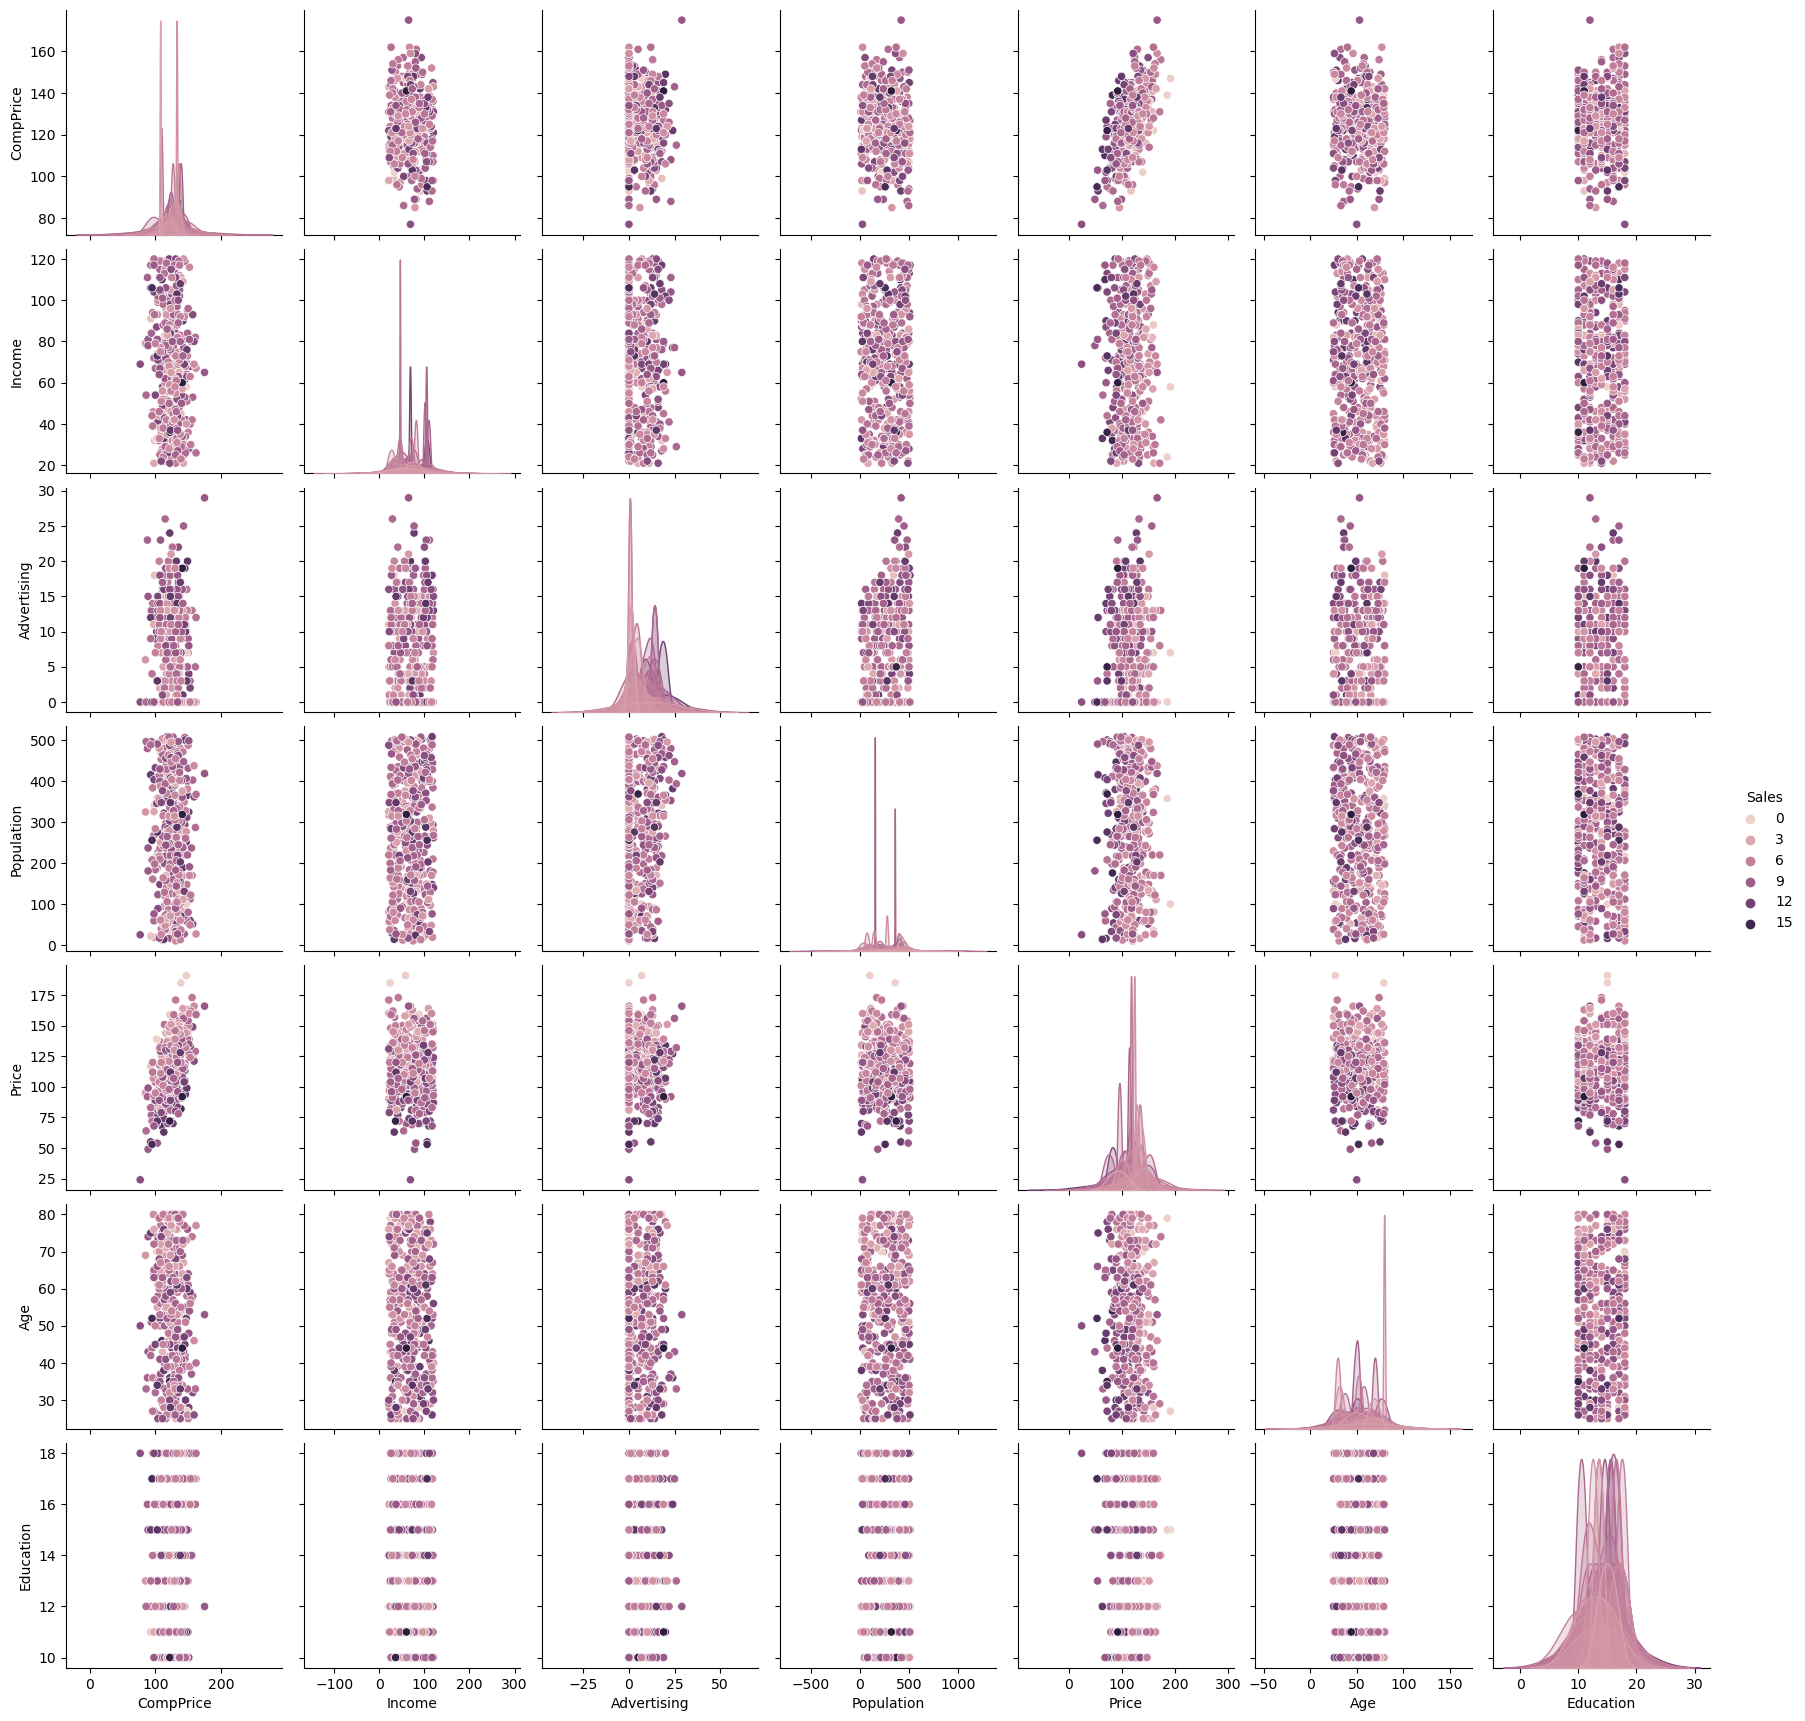

In [6]:
#ploting pairplot
sns.pairplot(data=df, hue='Sales')
plt.show()

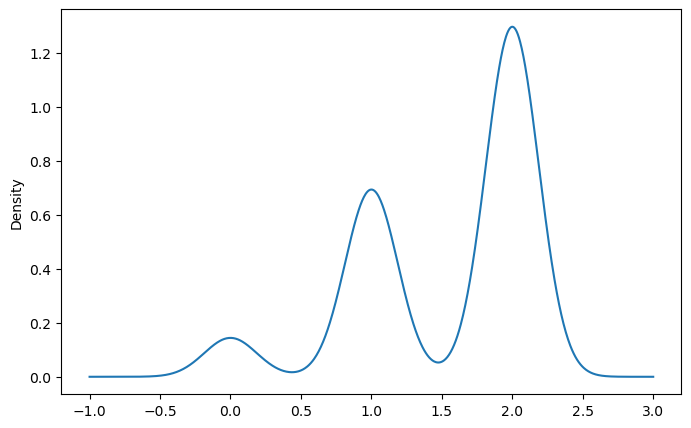

In [35]:
df['Sales'].plot(kind='kde', figsize=(8,5))
plt.show()

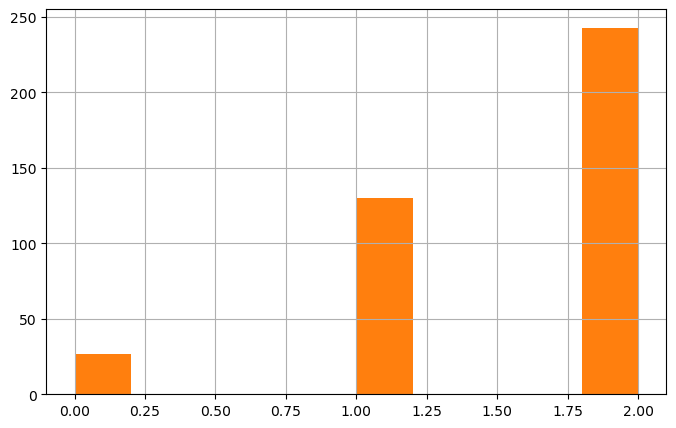

In [44]:
df['Sales'].hist(figsize=(8,5))
plt.show()

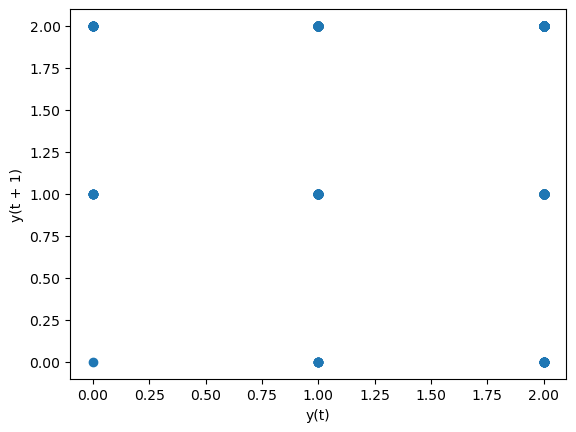

In [45]:
from pandas.plotting import lag_plot
lag_plot(df['Sales'])
plt.show()

In [7]:
# Converting other attributes into categories
df['CompPrice'] = pd.cut(x=df['CompPrice'],bins=[77, 100, 133, 176], labels=['Low','Medium', 'High'], right = False)
df['Sales'] = pd.cut(x=df['Sales'],bins=[0,6,12,17], labels=['Low','Medium', 'High'], right = False)
df['Income'] = pd.cut(x=df['Income'],bins=[21, 46, 71, 121], labels=['Low','Medium', 'High'], right = False)

df['Advertising'] = pd.cut(x=df['Advertising'],bins=[0, 10, 20, 30], labels=['Low','Medium', 'High'], right = False)

df['Population'] = pd.cut(x=df['Population'],bins=[10, 170, 340, 510], labels=['Low','Medium', 'High'], right = False)

df['Price'] = pd.cut(x=df['Price'],bins=[24, 80, 136, 192], labels=['Low','Medium', 'High'], right = False)

df['Age'] = pd.cut(x=df['Age'],bins=[25, 45, 60, 81], labels=['Low','Medium', 'High'], right = False)

df['Education'] = pd.cut(x=df['Education'],bins=[10, 12.5, 15, 19], labels=['Low','Medium','High'],right=False)

In [8]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,High,High,Medium,Medium,Medium,Bad,Low,High,Yes,Yes
1,Medium,Medium,Medium,Medium,Medium,Medium,Good,High,Low,Yes,Yes
2,Medium,Medium,Low,Medium,Medium,Medium,Medium,Medium,Low,Yes,Yes
3,Medium,Medium,High,Low,High,Medium,Medium,Medium,Medium,Yes,Yes
4,Low,High,Medium,Low,High,Medium,Bad,Low,Medium,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,High,High,Medium,Medium,Medium,Good,Low,Medium,Yes,Yes
396,Medium,High,Low,Low,Low,Medium,Medium,Medium,Low,No,Yes
397,Medium,High,Low,Medium,High,High,Medium,Low,High,Yes,Yes
398,Low,Medium,High,Low,Medium,Medium,Bad,Medium,Low,Yes,Yes


In [9]:
label_encoder = preprocessing.LabelEncoder()
df['Sales'] = label_encoder.fit_transform(df['Sales'])
df['CompPrice'] = label_encoder.fit_transform(df['CompPrice'])
df['Income'] = label_encoder.fit_transform(df['Income'])
df['Advertising'] = label_encoder.fit_transform(df['Advertising'])
df['Population'] = label_encoder.fit_transform(df['Population'])
df['Price'] = label_encoder.fit_transform(df['Price'])
df['ShelveLoc'] = label_encoder.fit_transform(df['ShelveLoc'])
df['Age'] = label_encoder.fit_transform(df['Age'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Urban'] = label_encoder.fit_transform(df['Urban'])
df['US'] = label_encoder.fit_transform(df['US'])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,0,0,2,2,2,0,1,0,1,1
1,2,2,2,2,2,2,1,0,1,1,1
2,2,2,1,2,2,2,2,2,1,1,1
3,2,2,0,1,0,2,2,2,2,1,1
4,1,0,2,1,0,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,2,2,2,1,1,2,1,1
396,2,0,1,1,1,2,2,2,1,0,1
397,2,0,1,2,0,0,2,1,0,1,1
398,1,2,0,1,2,2,0,2,1,1,1


In [10]:
# Dividing data into independent variables and dependent variable
X = df.drop('Sales', axis = 1)
Y= df['Sales']

In [11]:
df.Sales.unique()

array([2, 1, 0])

In [12]:
df.Sales.value_counts()

2    243
1    130
0     27
Name: Sales, dtype: int64

In [13]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [14]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=40)

Building Decision Tree Classifier using Entropy Criteria

In [15]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

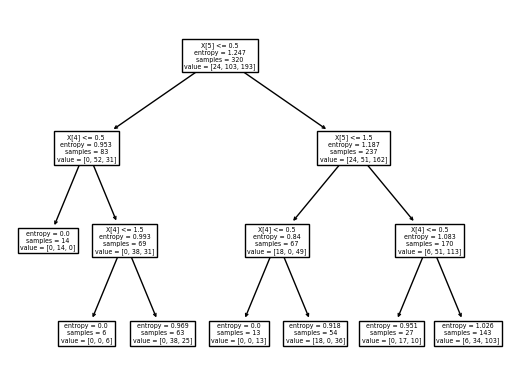

In [16]:
#PLot the decision tree
tree.plot_tree(model);
plt.show()

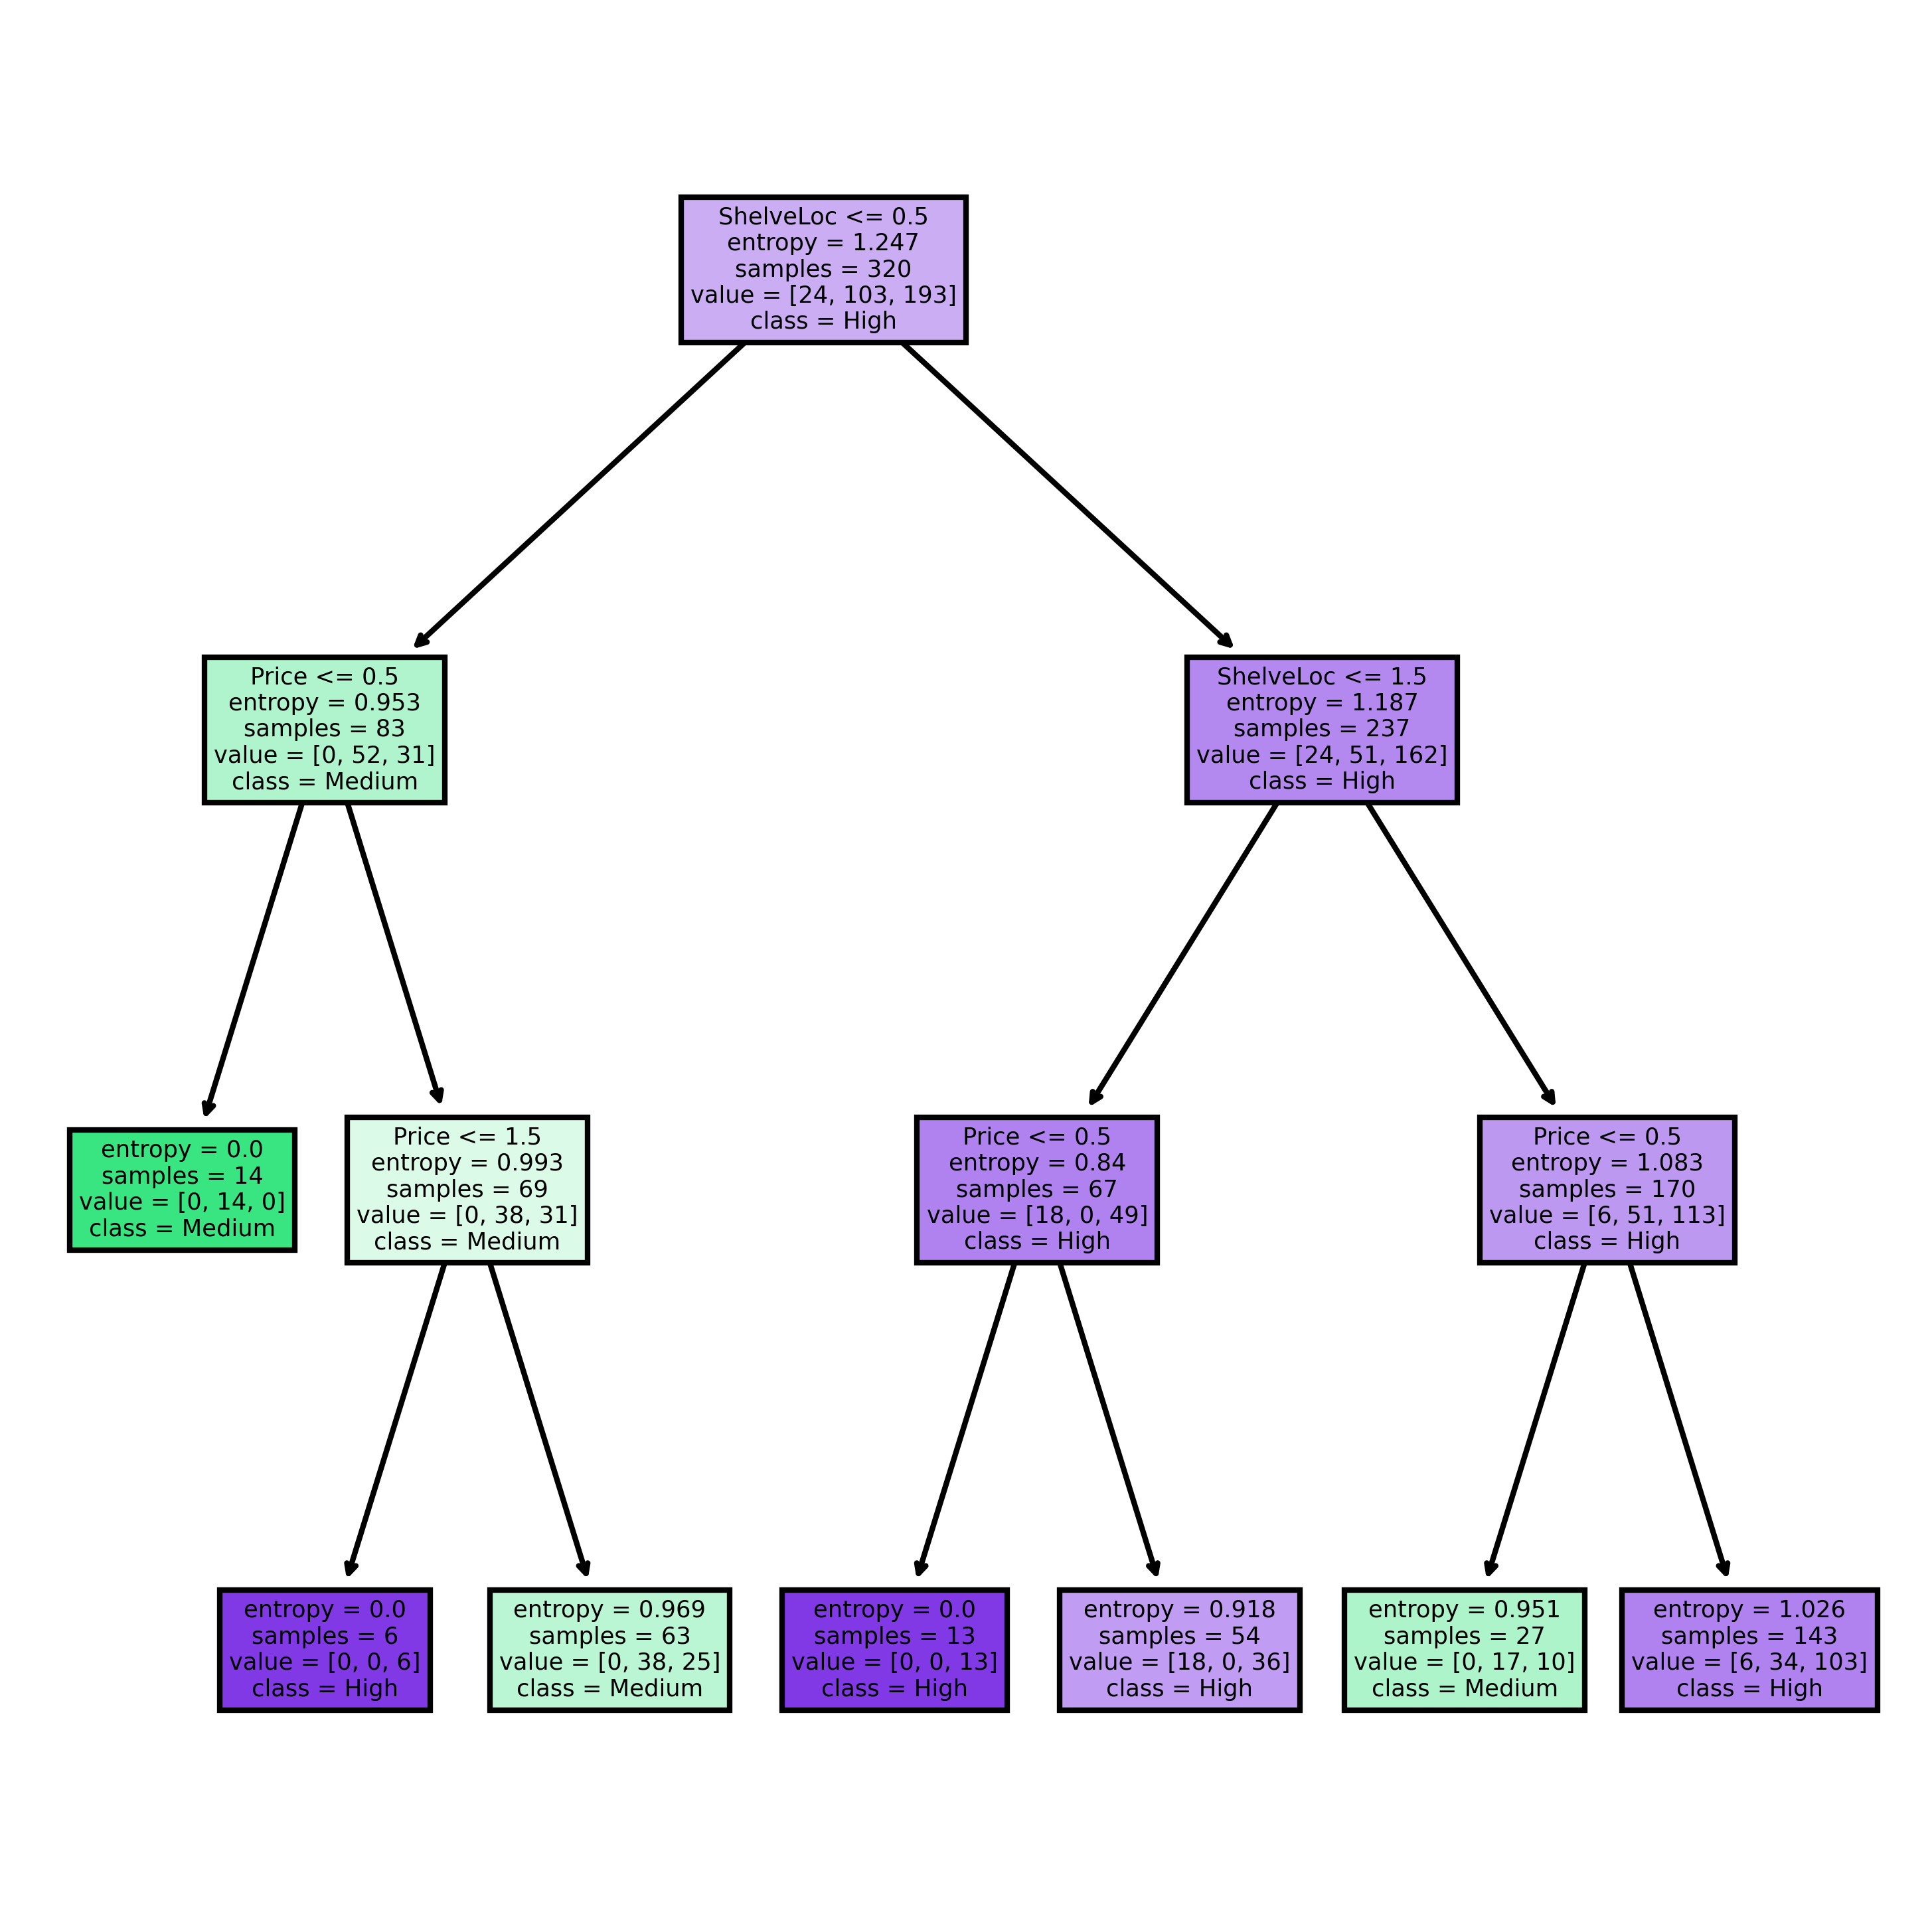

In [17]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.show()

In [18]:
# Predicting Data
preds = model.predict(x_test)

In [19]:
preds

array([2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1])

In [20]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,1,2
Sales,,
0,0,3
1,16,11
2,8,42


In [21]:
# Checking accuracy of model
model.score(x_test, y_test)

0.725

## Building Model Based on CART Algorithm

In [22]:
model_CART = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)
model_CART.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [23]:
# Plotting Decision tree
plt.figure(dpi=1200)
tree.plot_tree(model_CART);

In [24]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_CART,
               feature_names = fn, 
               class_names=cn,
               filled = True);


In [25]:
# Predicting Data
preds = model_CART.predict(x_test)
pd.Series(preds).value_counts()

2    55
1    24
0     1
dtype: int64

In [26]:
preds

array([2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1])

In [27]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,0,1,2
Sales,,,
0,0,0,3
1,0,16,11
2,1,8,41


In [28]:
# Checking accuracy of model
model_CART.score(x_test, y_test)

0.7125